In [1]:
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append('./eval-algos/S7/models/')

from utils.allocator import AllocationConfig, allocate_with_constraints

In [2]:
## Onchain Builders

In [3]:
from onchain_builders import OnchainBuildersCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/onchain_builders_testing.yaml')
df_data = load_data(ds)

display_name
Aerodrome Finance    0.234915
Aave                 0.160078
Virtuals Protocol    0.051399
Moonwell             0.050382
Zora                 0.043898
Layer3               0.041570
Synthetix            0.039551
Compound             0.033168
Beefy Finance        0.031760
LI.FI                0.029959
Velodrome            0.028103
Across               0.022449
Balancer             0.015704
LayerZero            0.014099
Sushi                0.013661
Name: weighted_score, dtype: float64


<Axes: >

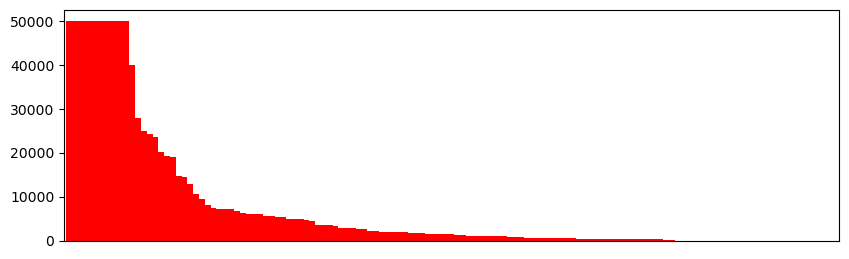

In [4]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 1.0, 'Growth': 0, 'Retention': 0})
calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score'].reset_index().set_index('display_name')['weighted_score']
print(scores.head(15))

rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

display_name
Zora                 0.103171
Layer3               0.097729
Aerodrome Finance    0.073061
LI.FI                0.070414
Across               0.052730
Virtuals Protocol    0.041366
Aave                 0.038989
LayerZero            0.032016
Sushi                0.030062
BaseSwap             0.030020
Hyperlane            0.025432
Odos                 0.024924
Paragraph            0.019565
OpenOcean            0.018992
Pyth Network         0.016663
Name: weighted_score, dtype: float64


<Axes: >

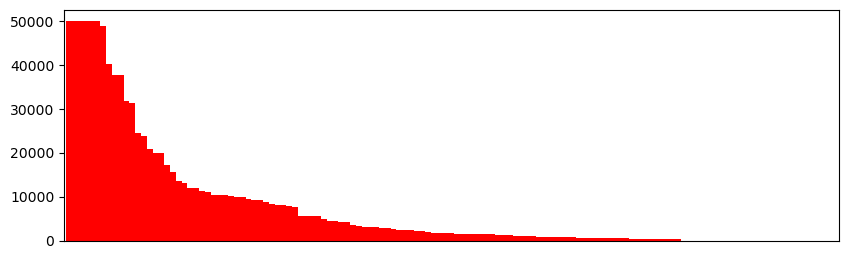

In [5]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 0.0, 'Growth': 0, 'Retention': 1.0})
sim_cfg.metrics.update({'monthly_active_farcaster_users': 1.0})

calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score'].reset_index().set_index('display_name')['weighted_score']
print(scores.head(15))

rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

In [6]:
## Devtooling

In [7]:
from devtooling_openrank import DevtoolingCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_openrank_testing.yaml')
data = load_data(ds)

sim_cfg.time_decay.update(
    {
        'event_to_devtooling_repo': 0.5,
        'commit_to_onchain_repo': 0.5
    }
)
calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*data)

scores = (
    analysis['devtooling_project_results']
    .set_index('display_name')
    ['v_aggregated']
    .sort_values(ascending=False)
)
scores = scores[scores>0]
scores.head(15)

INFO:root:eigentrust compute took 1.4806916250381619 secs 


display_name
wevm                    0.094427
DefiLlama               0.062323
Foundry                 0.060451
Optimism                0.057276
ethers.js               0.054644
OpenZeppelin            0.052866
Rainbow                 0.033014
Hardhat                 0.027930
Snapshot                0.026889
Ethereum Cat Herders    0.025307
EthereumJS              0.022168
Sushi                   0.020749
Solidity                0.019042
Buidl Guidl             0.017782
geth                    0.016815
Name: v_aggregated, dtype: float64

<Axes: >

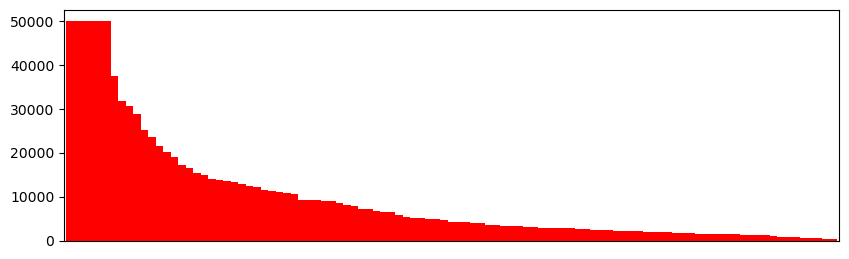

In [8]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))